In [68]:
import pandas as pd
import env
import wrangle1

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.model_selection import train_test_split

Exercises

Our Zillow scenario continues:

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

    As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

    Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

    Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

    Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

    Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

    Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

    Come up with some initial hypotheses based on your goal of predicting property value.

    Visualize all combinations of variables in some way.

    Run the appropriate statistical tests where needed.

    What independent variables are correlated with the dependent variable, home value?

    Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

    Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

    Explore your dataset with any other visualizations you think will be helpful.


In [2]:
# a, b

In [3]:
df, train, validate, test = wrangle1.wrangle_zillow()

In [4]:
df = train

In [30]:
df.shape

(1176039, 6)

# c 
Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [5]:
def plot_variable_pairs(df):
    return sns.pairplot(df.sample(5000), diag_kind = 'kde', kind = 'reg', corner=True)

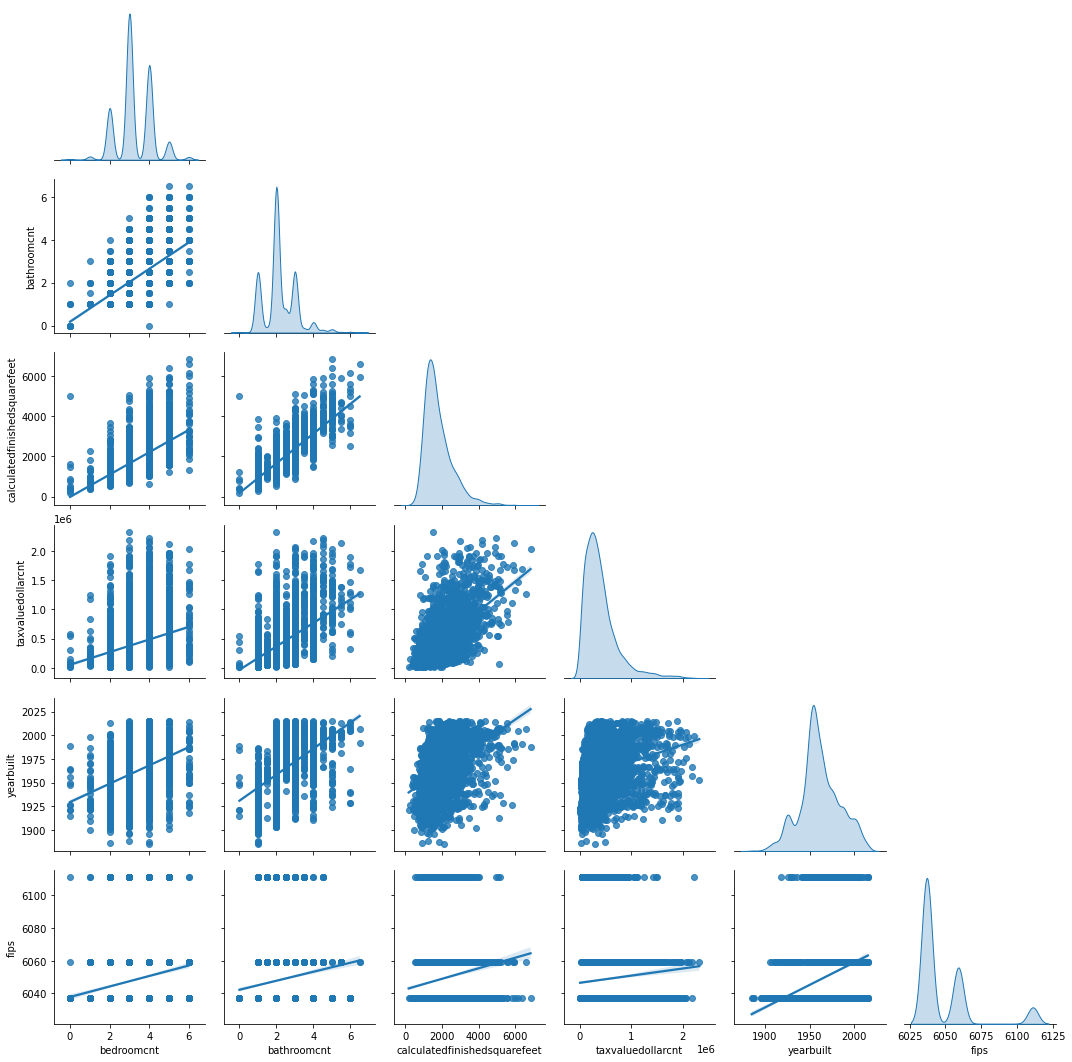

In [6]:
plot_variable_pairs(train)

# d
Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [7]:
    df.rename(columns = {'bedroomcnt': 'bed', 'bathroomcnt': 'bath', 'calculatedfinishedsquarefeet' : 'sqft',
       'taxvaluedollarcnt': 'tax_value'}, inplace = True)

In [8]:
cat_col = list(df[['bed', 'bath', 'yearbuilt', 'fips']])

In [9]:
cat_col

['bed', 'bath', 'yearbuilt', 'fips']

In [10]:
cont_col = list(df[['sqft']])
cont_col

['sqft']

In [11]:
cont_targ = df.tax_value

In [12]:
df.head()

,bed,bath,sqft,tax_value,yearbuilt,fips
415076,3.0,2.0,1412.0,60678.0,1971.0,6037.0
396128,4.0,2.0,1765.0,337206.0,1965.0,6059.0
51748,3.0,1.5,1250.0,51854.0,1955.0,6059.0
1172803,3.0,2.5,2628.0,800380.0,1987.0,6059.0
1341986,4.0,3.0,2756.0,852809.0,1990.0,6037.0


In [13]:
df.yearbuilt.min()

1801.0

In [14]:
df.yearbuilt.max()

2016.0

In [15]:
year_bins = pd.cut(df.yearbuilt, bins = 5)

In [16]:
l = pd.DataFrame(year_bins.value_counts())
l

,yearbuilt
"(1930.0, 1973.0]",750023
"(1973.0, 2016.0]",306020
"(1887.0, 1930.0]",119788
"(1844.0, 1887.0]",203
"(1800.785, 1844.0]",5


In [17]:
df.groupby('yearbuilt').tax_value.mean()

yearbuilt
1801.0    790200.000000
1807.0     67869.000000
1812.0    165518.000000
1823.0     35989.000000
1855.0     23724.000000
              ...      
2012.0    822164.563681
2013.0    898511.997390
2014.0    893071.138998
2015.0    836400.707537
2016.0    619212.450980
Name: tax_value, Length: 150, dtype: float64

<AxesSubplot:xlabel='bed'>

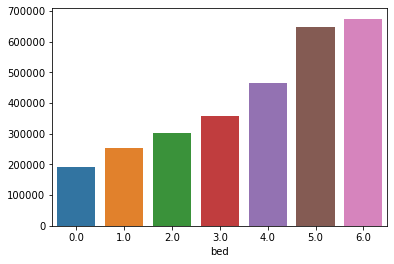

In [18]:
sns.barplot(x = df.groupby('bed').tax_value.mean().index, y = df.groupby('bed').tax_value.mean().values,)

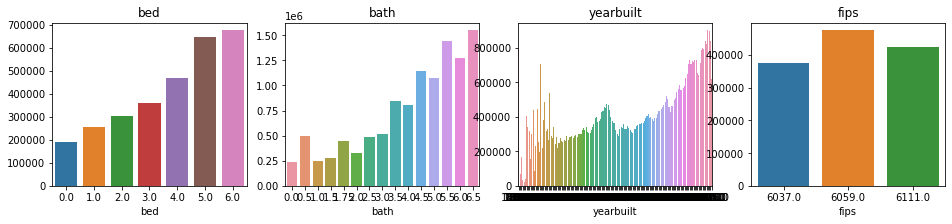

In [19]:
plt.figure(figsize=(16, 3))

for i, col in enumerate(cat_col):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1

    l= len(cat_col)

    plt.subplot(1,l,plot_number)

    # Title with column name.
    plt.title(col)

    sns.barplot(x = df.groupby(col).tax_value.mean().index, y = df.groupby(col).tax_value.mean().values,)

In [20]:
df.bath.value_counts(sort = False).sort_index()

0.00      2319
0.50         8
1.00    231067
1.50     17565
1.75         2
2.00    526267
2.50     79430
3.00    234288
3.50     15156
4.00     42175
4.50      9695
5.00     12118
5.50      2384
6.00      3225
6.50       340
Name: bath, dtype: int64

In [21]:
cont_targ

415076      60678.0
396128     337206.0
51748       51854.0
1172803    800380.0
1341986    852809.0
             ...   
593523     135048.0
1040025     23242.0
1889920    148930.0
614976     185730.0
826170      63149.0
Name: tax_value, Length: 1176039, dtype: float64

In [22]:
def plot_categorical_and_continuous_vars_attempt_1(df, cat_col, cont_col):

    plt.figure(figsize=(16, 3))

    for i, col in enumerate(cat_col):

        # i starts at 0, but plot nos should start at 1
        plot_number = i + 1

        l= len(cat_col)

        plt.subplot(1,l,plot_number)

        # Title with column name.
        plt.title(col)

        sns.barplot(x = df.groupby(col).tax_value.mean().index, y = df.groupby(col).tax_value.mean().values)

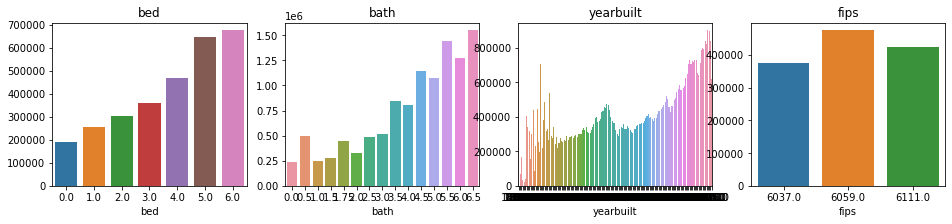

In [23]:
plot_categorical_and_continuous_vars(df, cat_col, cont_col)

In [24]:
df

,bed,bath,sqft,tax_value,yearbuilt,fips
415076,3.0,2.0,1412.0,60678.0,1971.0,6037.0
396128,4.0,2.0,1765.0,337206.0,1965.0,6059.0
51748,3.0,1.5,1250.0,51854.0,1955.0,6059.0
1172803,3.0,2.5,2628.0,800380.0,1987.0,6059.0
1341986,4.0,3.0,2756.0,852809.0,1990.0,6037.0
...,...,...,...,...,...,...
593523,3.0,2.0,1968.0,135048.0,1970.0,6037.0
1040025,1.0,1.0,505.0,23242.0,1965.0,6037.0
1889920,4.0,2.0,2452.0,148930.0,1964.0,6037.0
614976,2.0,1.0,1046.0,185730.0,1949.0,6037.0


In [25]:
#continous

<AxesSubplot:xlabel='sqft', ylabel='tax_value'>

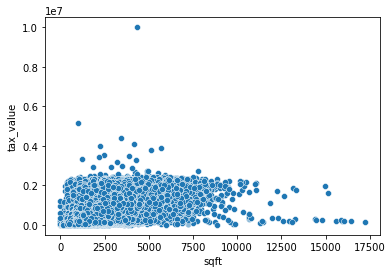

In [26]:
sns.scatterplot(x = df.sqft, y =  df.tax_value)

<AxesSubplot:xlabel='bed', ylabel='tax_value'>

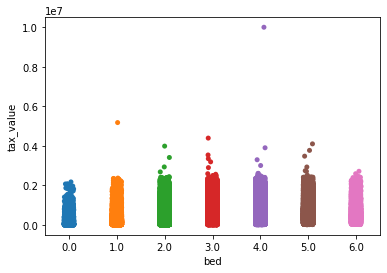

In [44]:
sns.stripplot(x = df.bed, y = df.tax_value)

In [48]:
def plot_categorical_and_continuous_vars(df, cat_col, cont_col):

    for i, col in enumerate(cat_col):
        plt.figure(figsize=(16, 3))
        # i starts at 0, but plot nos should start at 1
        plot_number = i + 1

        l= len(cat_col)

        plt.subplot(1,l,plot_number)

        # Title with column name.
        plt.title(col)
        
        sns.stripplot(x = df[col], y = df.tax_value)
        #--------------------------------------------------------------
        plt.figure(figsize=(16, 3))
        # i starts at 0, but plot nos should start at 1
        plot_number = i + 1

        l= len(cat_col)

        plt.subplot(1,l,plot_number)

        # Title with column name.
        plt.title(col)
        
        sns.boxplot(df[col], y = df.tax_value)
        
        #--------------------------------------------------------------
        plt.figure(figsize=(16, 3))
        # i starts at 0, but plot nos should start at 1
        plot_number = i + 1

        l= len(cat_col)

        plt.subplot(1,l,plot_number)

        # Title with column name.
        plt.title(col)
        
        sns.barplot(df[col], y = df.tax_value)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt

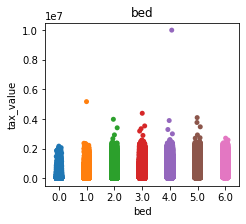

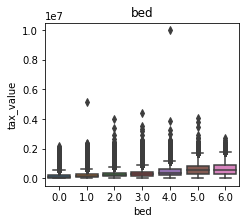

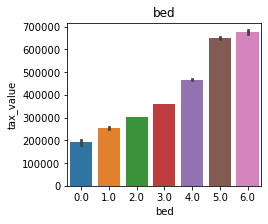

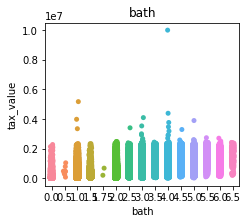

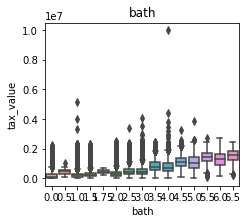

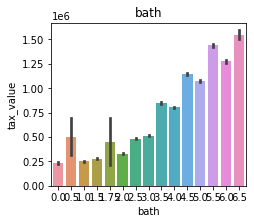

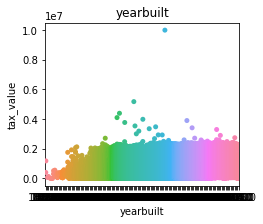

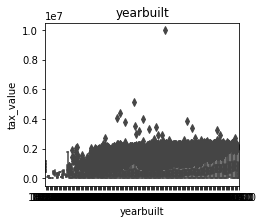

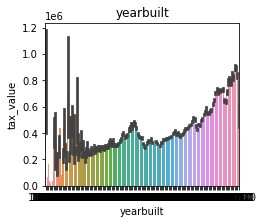

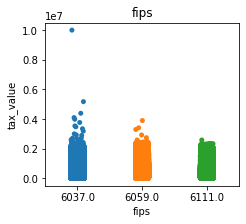

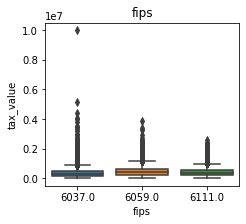

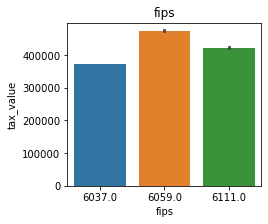

In [49]:
plot_categorical_and_continuous_vars(df, cat_col, cont_col)

In [ ]:
# need to be pickier about outliers

# 5 & 6

Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.
Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

In [51]:
from explore import plot_variable_pairs, plot_categorical_and_continuous_vars;

In [54]:
df, train, validate, test = wrangle1.wrangle_zillow()

In [56]:
df.rename(columns = {'bedroomcnt': 'bed', 'bathroomcnt': 'bath', 'calculatedfinishedsquarefeet' : 'sqft',
       'taxvaluedollarcnt': 'tax_value'}, inplace = True)

In [57]:
train.rename(columns = {'bedroomcnt': 'bed', 'bathroomcnt': 'bath', 'calculatedfinishedsquarefeet' : 'sqft',
       'taxvaluedollarcnt': 'tax_value'}, inplace = True)

In [58]:
cat_col = list(df[['bed', 'bath', 'yearbuilt', 'fips']])

In [59]:
cont_col = list(df[['sqft']])

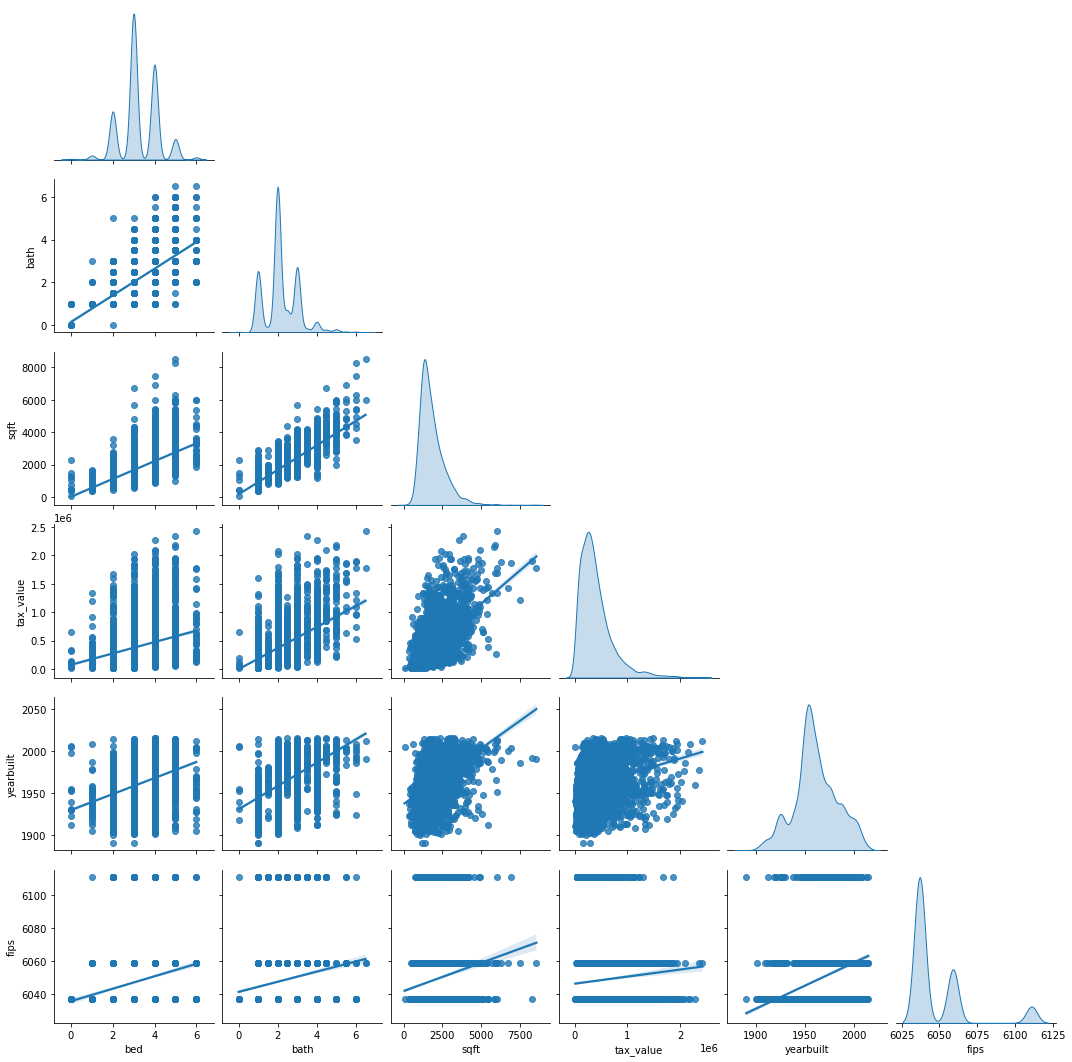

In [52]:
plot_variable_pairs(train)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt

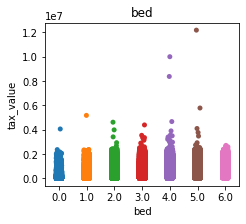

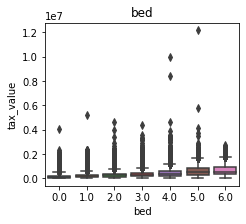

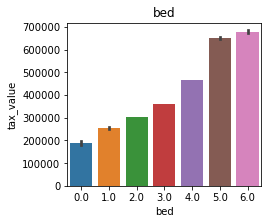

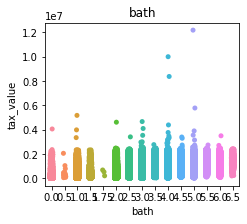

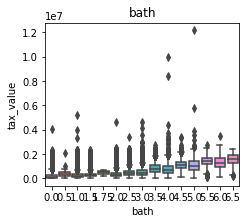

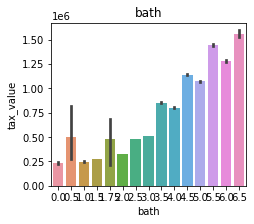

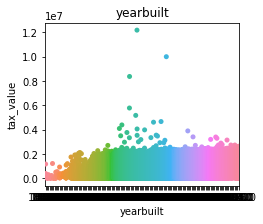

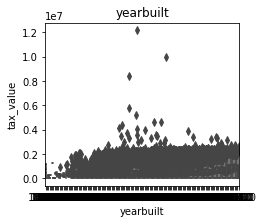

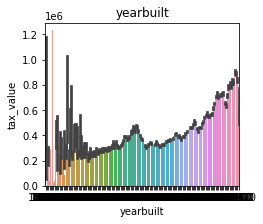

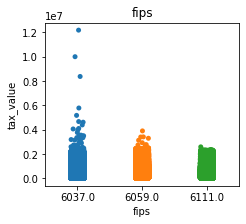

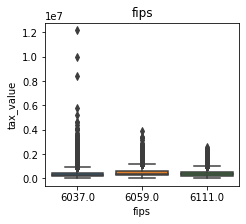

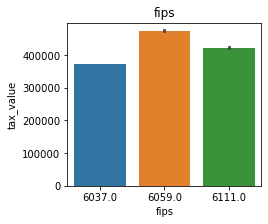

In [61]:
plot_categorical_and_continuous_vars(df, cat_col, cont_col)



# 7

Come up with some initial hypotheses based on your goal of predicting property value.

    - target variable trends nicely with beds, bath, 
    - I think trends in sqrft are hard to see. I think I need more judicial oversight into what constitutes an outlier.


# 8
Visualize all combinations of variables in some way.

In [63]:
train_cor = train.corr()
train_cor

,bed,bath,sqft,tax_value,yearbuilt,fips
bed,1.000000,0.629012,0.610711,0.275905,0.386661,0.150655
bath,0.629012,1.000000,0.817228,0.515876,0.532991,0.123211
sqft,0.610711,0.817228,1.000000,0.592021,0.476213,0.132125
tax_value,0.275905,0.515876,0.592021,1.000000,0.274374,0.077173
yearbuilt,0.386661,0.532991,0.476213,0.274374,1.000000,0.306317
fips,0.150655,0.123211,0.132125,0.077173,0.306317,1.000000


<AxesSubplot:>

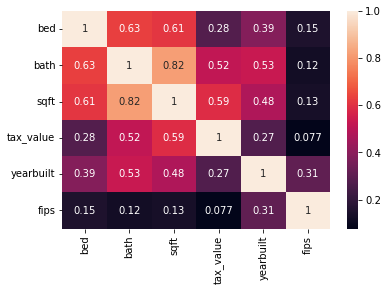

In [83]:
sns.heatmap(train_cor, annot = True)

In [ ]:
#sqft and bath are stongly correlated
# tax value and sqft are strongly correlated



# 9
Run the appropriate statistical tests where needed. (modeld after class)

In [66]:
alpha = .05

In [71]:
r_bed, p_bed = stats.pearsonr(x=train.bed, y = train.tax_value)
r_bed, p_bed

(0.2759052726818736, 0.0)

In [72]:
r_bath, p_bath = stats.pearsonr(x=train.bath, y = train.tax_value)
r_bath, p_bath

(0.5158756782264524, 0.0)

In [80]:
r_sqft, p_sqft = stats.pearsonr(x=train.sqft, y = train.tax_value)
r_sqft, p_sqft

(0.5920210281000922, 0.0)

# 10
What independent variables are correlated with the dependent variable, home value?


p < alpha for both bed and bath. Therefore, there are correlated.

the correlation coefficient is grater for baths, it indicates a stronger correlation



# 11
Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

In [75]:
r, p = stats.pearsonr(x=train.bed, y = train.bath)
r, p

(0.6290123206987422, 0.0)

In [76]:
r, p = stats.pearsonr(x=train.yearbuilt, y = train.bed)
r, p

(0.38666093875339613, 0.0)

In [78]:
r, p = stats.pearsonr(x=train.yearbuilt, y = train.sqft)
r, p

(0.4762125004240465, 0.0)

In [79]:
r, p = stats.pearsonr(x=train.bed, y = train.sqft)
r, p

(0.6107107442848951, 0.0)

In [81]:
r, p = stats.pearsonr(x=train.bath, y = train.sqft)
r, p

(0.8172275494481123, 0.0)

In [ ]:
# lots of correlation between independent variables, perhaps feature engineering can combine a few

# 12
Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.


In [ ]:
# need to be pickier about outliers

In [ ]:
#     - target variable trends nicely with beds, bath, 
#     - I think trends in sqrft are hard to see. I think I need more judicial oversight into what constitutes an outlier.

In [ ]:
# lots of correlation between independent variables, perhaps feature engineering can combine a few

# 13
Explore your dataset with any other visualizations you think will be helpful.

<AxesSubplot:xlabel='sqft', ylabel='tax_value'>

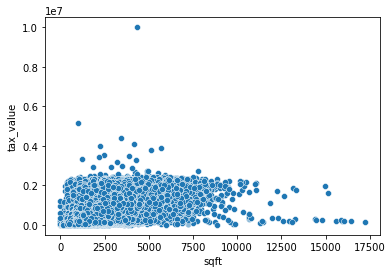

In [82]:
sns.scatterplot(x=train.sqft, y = train.tax_value)